<a href="https://colab.research.google.com/github/MKolaksazov/Data-Science/blob/main/Colab%20code%20(graphs)/Tukey_test_letters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drawing a 'BOXPLOT' graph

Includes letters, showing the significant differences between variants, derived by the means of the Tukey's test.

####1) importing of the libraries and the **.csv** file

The columns of this table file should containt parameters, whereas the group variants written as indexes of the rows. These indexes will be shown in the first column, named *'groups'*.

the delimiter is usually a semicolon ```;```, but can be a tabulation ```\t```


In [142]:
import pandas as pd
import numpy as np
# exp_0726_OJIP_p
df = pd.read_csv("/content/LCpro-220701-2.csv", delimiter='\t', decimal=',') # delimiter '\t' or ';'

1.2) Popping out the labels of the variation groups in a dataframe, called *'names'*.
Transposing the dataframe, so that it can be easily processed by the covariance test analysis and matplotlib. Converting it into numpy array.

In [143]:
names = df.pop('groups')
transposed_df = df.T
named = np.array(names)
transposed_df

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
Unnamed: 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A,34.1,34.27,32.48,30.51,30.74,32.32,23.51,27.28,26.84,25.28,...,26.02,28.83,27.24,28.92,30.08,32.95,20.93,21.35,20.27,18.05


1.3) An optional step required to abbreviate the longer latin names of the crops, so that they can fit in the graph.

In [144]:
import re
# Abbreviating the latin names from 'Aaaaa aaaaaa (L.)' to 'A. aaaaaa (L.)'
for i in range(len(names)):
    c = names[i][0]
    names[i] = re.sub(r'[A-Z]([a-z]+ )', c + '. ', names[i])
names

0     `1
1     `1
2     `1
3     `1
4     `1
      ..
68    `6
69    `7
70    `7
71    `7
72    `7
Name: groups, Length: 73, dtype: object

1.4) Popping out the column with the desired parameter by writing the name in the 'pop' function, as well as transposing it.

In [145]:
params = df.pop('A') #required param
transp_df = params.T

#dff = np.array(params)

1.5) Converting the dataframe into a 1D numpy array

In [146]:
from matplotlib.patches import namedtuple
#convert dataframe to matrix
conv_arr= transp_df.values

#split matrix into 3 columns each into 1d array

#converting into 1D array
one_D_array = conv_arr.ravel()

print(one_D_array)

# variants as well:
print(names)

[34.1  34.27 32.48 30.51 30.74 32.32 23.51 27.28 26.84 25.28 33.69 33.44
 18.98 23.31 22.98 26.34 25.15 32.35 29.28 23.01 28.65 28.48 17.74 17.89
 18.83 28.96 27.51 28.46 29.54 29.51 29.78 30.07 22.37 20.41 16.   16.57
 22.73 21.14 23.32 19.86 26.58 23.59 22.59 29.4  28.37 29.41 33.79 33.23
 31.92 33.64 34.64 34.36 34.63 35.46 24.23 27.33 27.21 26.76 20.91 26.08
 27.77 27.77 26.34 26.02 28.83 27.24 28.92 30.08 32.95 20.93 21.35 20.27
 18.05]
0     `1
1     `1
2     `1
3     `1
4     `1
      ..
68    `6
69    `7
70    `7
71    `7
72    `7
Name: groups, Length: 73, dtype: object


####2) arranging the data by samples column-wise and taking out the names of the variants in a different array

Converting the 2-D pandas dataframe into a 1-D numpy array. ```numpy.append(array1, array2) ``` can be used to append two arrays.

Probably ```pandas.dataframe.pop()``` can be used as well.

In [147]:
# Sample data (replace this with your data)
data = pd.DataFrame({
    'Variant': names,
    'Value': one_D_array
})

3) performing the co-variance test
(the following is a variant, showing the t-test)
(currently not shown)

4) This is a very simple code, showing a Tukey's test analysis and printing the summarized data

In [148]:
import statsmodels.stats.multicomp as mc

# Perform one-way ANOVA to check for significant differences
model = mc.MultiComparison(data['Value'], data['Variant'])
result = model.tukeyhsd()

print(result.summary(), len(result.reject))

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
    `1     `2   -1.787 0.9461  -7.0838  3.5098  False
    `1     `3  -6.8891 0.0025 -12.0641 -1.7141   True
    `1     `4   -8.987    0.0 -14.2838 -3.6902   True
    `1     `5   -4.198 0.2108  -9.4948  1.0988  False
    `1     `6  -8.9064    0.0 -14.0814 -3.7313   True
    `1     `7  -9.0273    0.0 -14.2023 -3.8523   True
    `2     `3  -5.1021 0.0558 -10.2771  0.0729  False
    `2     `4     -7.2 0.0019 -12.4968 -1.9032   True
    `2     `5   -2.411 0.8082  -7.7078  2.8858  False
    `2     `6  -7.1194 0.0016 -12.2944 -1.9443   True
    `2     `7  -7.2403 0.0013 -12.4153 -2.0653   True
    `3     `4  -2.0979 0.8787  -7.2729  3.0771  False
    `3     `5   2.6911 0.6944  -2.4839  7.8661  False
    `3     `6  -2.0173  0.886  -7.0676   3.033  False
    `3     `7  -2.1382 0.8552  -7.1885  2.9121  False
    `4     `5    4.789 0.102

In [149]:
import scipy.stats as stats
import matplotlib.pyplot as plt

In [150]:
# define columns for data and then grouping
col_to_group='Variant'
col_for_data='Value'

#Now take teh data and regroup for anova
samples = [cols[1] for cols in data.groupby('Variant')['Value']]
#I am not sure how this works but it makes an numpy array for each group
f_val, p_val = stats.f_oneway(*samples)
# I am not sure what this star does but this passes all the numpy arrays correctly

# this if statement can be uncommmented if you don't won't to go furhter with out p<0.05
#if p_val<0.05:    #If the p value is less than 0.05 it then does the tukey
mod = mc.MultiComparison(data['Value'], data['Variant'])
thsd=mod.tukeyhsd()

#this is a function to do Piepho method.
#AN Alogrithm for a letter based representation of al-pairwise comparisons.
tot=len(thsd.groupsunique)
#make an empty dataframe that is a square matrix of size of the groups. #set first column to 1
df_ltr=pd.DataFrame(np.nan, index=np.arange(tot),columns=np.arange(tot))
#df_ltr.iloc[:,0]=1
df_ltr[df_ltr.columns[0]] = 1
#df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)

count=0
df_nms = pd.DataFrame('', index=np.arange(tot), columns=['names'])
# I make a dummy dataframe to put axis labels into.  sd stands for signifcant difference

for i in np.arange(tot):   #I loop through and make all pairwise comparisons.
    for j in np.arange(i+1,tot):
        #print('i=',i,'j=',j,thsd.reject[count])
        if thsd.reject[count]==True:
            for cn in np.arange(tot):
                if df_ltr.iloc[i,cn]==1 and df_ltr.iloc[j,cn]==1:
                  #If the column contains both i and j shift and duplicat
                    df_ltr=pd.concat([df_ltr.iloc[:,:cn+1],df_ltr.iloc[:,cn+1:].T.shift().T],axis=1)
                    df_ltr[df_ltr.columns[cn+1]]=df_ltr[df_ltr.columns[cn]]
                    df_ltr.iloc[i,cn]=0
                    df_ltr.iloc[j,cn+1]=0
                #Now we need to check all columns for abosortpion.
                for cleft in np.arange(len(df_ltr.columns)-1):
                    for cright in np.arange(cleft+1,len(df_ltr.columns)):
                        if (df_ltr[df_ltr.columns[cleft]].isna()).all()==False and (df_ltr[df_ltr.columns[cright]].isna()).all()==False:
                            if (df_ltr[df_ltr.columns[cleft]]>=df_ltr[df_ltr.columns[cright]]).all()==True:
                                df_ltr[df_ltr.columns[cright]]=0
                                df_ltr=pd.concat([df_ltr[df_ltr.columns[:cright]],df_ltr[df_ltr.columns[cright:]].T.shift(-1).T],axis=1)
                            if (df_ltr[df_ltr.columns[cleft]]<=df_ltr[df_ltr.columns[cright]]).all()==True:
                                df_ltr[df_ltr.columns[cleft]]=0
                                df_ltr=pd.concat([df_ltr[df_ltr.columns[:cleft]],df_ltr[df_ltr.columns[cleft:]].T.shift(-1).T],axis=1)

        count+=1

#I sort so that the first column becomes A
df_ltr=df_ltr.sort_values(by=list(df_ltr.columns),axis=1,ascending=False)

# I assign letters to each column
for cn in np.arange(len(df_ltr.columns)):
    df_ltr[df_ltr.columns[cn]]=df_ltr[df_ltr.columns[cn]].replace(1,chr(97+cn))
    df_ltr[df_ltr.columns[cn]]=df_ltr[df_ltr.columns[cn]].replace(0,'')
    df_ltr[df_ltr.columns[cn]]=df_ltr[df_ltr.columns[cn]].replace(np.nan,'')

#I put all the letters into one string
df_ltr=df_ltr.astype(str)
df_ltr.sum(axis=1)


0      a
1     ab
2     bc
3      c
4    abc
5      c
6      c
dtype: object

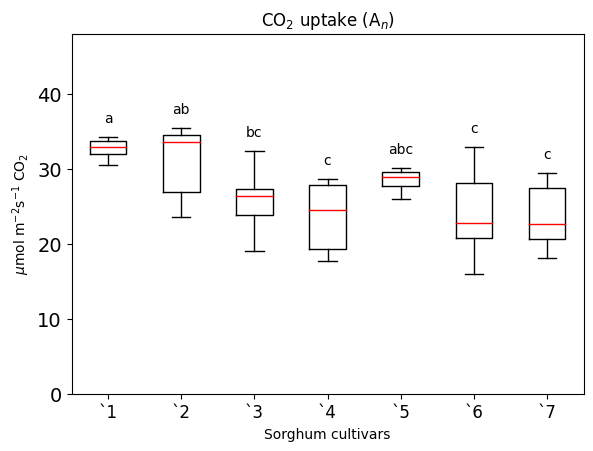

In [151]:

#Now to plot like R with a violing plot
fig,ax=plt.subplots()
data.boxplot(column=col_for_data, by=col_to_group,ax=ax,fontsize=14,
             medianprops=dict(color='red'),
             boxprops=dict(color='black'),
             whiskerprops=dict(color='black')
             )
#, #patch_artist=True)


#,showmeans=True
#,boxprops=dict(linewidth=2.0),whiskerprops=dict(linewidth=2.0))  #This makes the boxplot

grps=pd.unique(data[col_to_group].values)   #Finds the group names
grps.sort() # This is critical!  Puts the groups in alphabeical order to make it match the plotting

#props=dict(facecolor='white',alpha=1)
''''''
for i,grp in enumerate(grps):   #I loop through the groups to make the scatters and figure out the axis labels.
    y_pos = data[data['Variant'] == grp]['Value'].max() + 3.4
    #y_pos = ax.get_ylim()[1]*1
    ax.text(i+1,y_pos,df_ltr.sum(axis=1)[i],rotation=0,fontsize=10,verticalalignment='top',horizontalalignment='center')

ax.set_xticklabels(grps,rotation=0,fontsize=12)
#ax.set_xticks()
ax.set_ylim([0, 48])
ax.set(title='CO$_2$ uptake (A$_{n}$)', ylabel=r'$\mu$mol m$^{-2}$s$^{-1}$ CO$_2$', xlabel="Sorghum cultivars")
fig.suptitle('')

# PI $_{ABS}$ (performance index)
#

# CO$_2$ uptake (A$_{n}$)
# r'$\mu$mol m$^{-2}$s$^{-1}$ CO$_2$'

# Concentration of chlorophyll
# $\mu$mol m$^{-2}$ chl (cci)

# TAC - water extracts
# mM AAE g${^-1}$

# PI $_{ABS}$
# (a.u.)

plt.grid(False)
#fig.savefig('anovatest.jpg',dpi=600,bbox_inches='tight')

In [152]:
stat_result = data.groupby(['Variant'], as_index=False).agg(
                      {'Value':['mean','std']})
stat_result['Value']['std']

0    1.342320
1    4.602948
2    3.522869
3    4.563116
4    1.426852
5    5.443430
6    4.099534
Name: std, dtype: float64

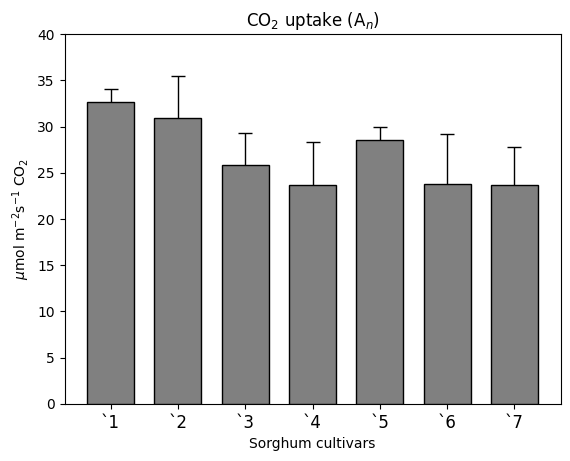

In [155]:
menMeans = stat_result['Value']['mean']
menStd = stat_result['Value']['std']
labels = stat_result['Variant']

ind  = np.arange(7)    # the x locations for the groups
width= 0.7
# Pull the formatting out here
bar_kwargs = {'width':width,'color':'grey','linewidth':1,'zorder':5,'edgecolor':'black'}
err_kwargs = {'zorder':0,'fmt':'None','linewidth':1,'ecolor':'black','capsize':5, 'capthick':1}
#for matplotlib >= v1.4 use 'fmt':'none' instead

fig, ax = plt.subplots()

ax.p1 = plt.bar(ind, menMeans, **bar_kwargs)
ax.errs = plt.errorbar(ind, menMeans, yerr=menStd, **err_kwargs)

# Custom function to draw the diff bars
'''
def label_diff(i,j,text,X,Y):
    x = (X[i]+X[j])/2
    y = 1.1*max(Y[i], Y[j])
    dx = abs(X[i]-X[j])

    props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':20,'shrinkB':20,'linewidth':2}
    ax.annotate(text, xy=(X[i],y+7), zorder=10)
    ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)

# Call the function
label_diff(0,1,'p=0.0370',ind,menMeans)
label_diff(1,2,'p<0.0001',ind,menMeans)
label_diff(2,3,'p=0.0025',ind,menMeans)
'''

plt.ylim(ymax=40)
plt.xticks(ind, labels, color='k')
ax.set_xticklabels(grps,rotation=0,fontsize=12)
#ax.set_yticklabels(fontsize=12)
ax.set(title='CO$_2$ uptake (A$_{n}$)', ylabel=r'$\mu$mol m$^{-2}$s$^{-1}$ CO$_2$', xlabel="Sorghum cultivars")
fig.suptitle('')

plt.show()